In [1]:
import numpy as np
import cupy as cp
import dxchange
import time
import matplotlib.pyplot as plt

import config
from rec_stream import ReconStream
%matplotlib inline

cp.cuda.set_pinned_memory_allocator(cp.cuda.PinnedMemoryPool().malloc)

spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found
olefile module not found


In [2]:
def get_data_pars(proj, flat, dark, theta):
    '''Get parameters of the data'''

    pars = {}
    pars['nproj'] = proj.shape[0]
    pars['nz'] = proj.shape[1]
    pars['n'] = proj.shape[2]
    pars['nflat'] = flat.shape[0]
    pars['ndark'] = dark.shape[0]
    pars['in_dtype'] = proj.dtype
    pars['theta'] = theta
    if isinstance(proj, cp.ndarray):
        pars['gpu_array'] = True
    else:
        pars['gpu_array'] = False
    return pars        

In [3]:

# init parameters with default values. can be done ones
# config.write_args('test.conf')
# read parameters
args = config.read_args('test.conf')

proj, flat, dark, theta = dxchange.read_aps_32id('/home/beams/TOMO/conda/tomocupy/tests/data/test_data.h5')
proj=np.pad(proj,((0,0),(0,0),(256,256)),'edge')
flat=np.pad(flat,((0,0),(0,0),(256,256)),'edge')
dark=np.pad(dark,((0,0),(0,0),(256,256)),'edge')
# proj = np.tile(proj,(1,100,1))
# flat = np.tile(flat,(1,100,1))
# dark = np.tile(dark,(1,100,1))

# proj = 100*np.ones([2048,2048,2048],dtype='uint16')
# dark = np.zeros([20,2048,2048],dtype='uint16')
# flat = 200*np.ones([10,2048,2048],dtype='uint16')
# theta = np.linspace(0,np.pi,2048).astype('float32')
# proj = cp.array(proj)
# flat = cp.array(flat)
# dark = cp.array(dark)
# theta = cp.array(theta)

pars = get_data_pars(proj, flat, dark, theta)

# # streaming reconstruction class
cl_recstream = ReconStream(args, pars)

# processing and reconstruction
t = time.time()
# cl_recstream.proc_rec_sino(proj, dark, flat)
cl_recstream.proc_sino(proj,dark,flat)
cl_recstream.proc_proj()
cl_recstream.rec_sino()
print(time.time()-t)
res3 = cl_recstream.get_res()


(720, 22, 1536)
0.46962594985961914


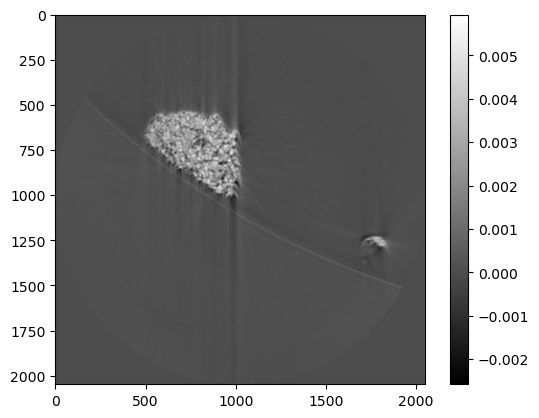

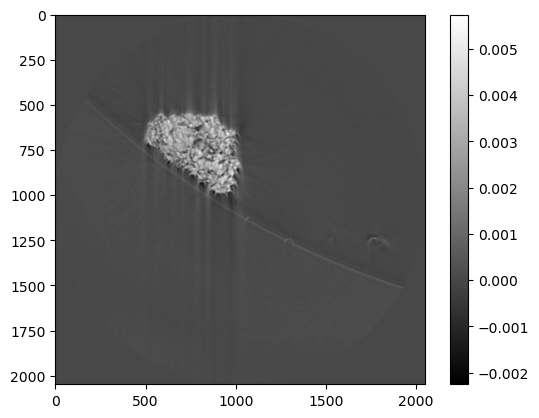

In [4]:
# print(np.linalg.norm(res3))
plt.imshow(res3[0],cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(res3[-1],cmap='gray')
plt.colorbar()
plt.show()